In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('/content/drive/MyDrive/project /Airline_Delay_Cause.csv')


In [3]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


# **Explore Data**

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [5]:
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0
318016,2003,6,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3466.0,454.0,121.15,7.61,...,1.0,102.33,9.0,0.0,16853.0,5384.0,306.0,5686.0,28.0,5449.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

In [7]:
df.isna().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,488
arr_del15,728
carrier_ct,488
weather_ct,488


<Axes: >

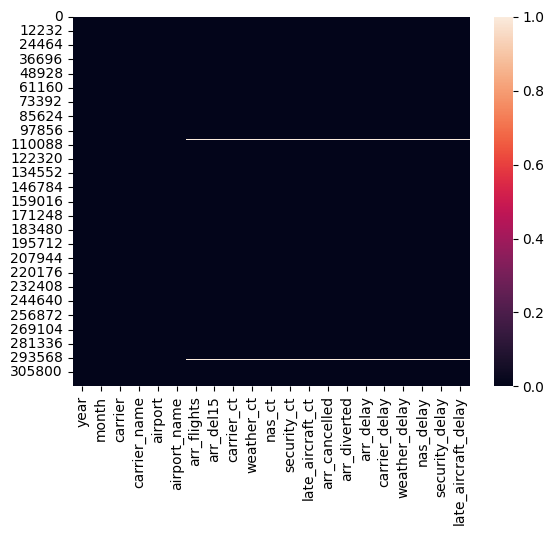

In [8]:
sns.heatmap(df.isna())

In [9]:
df.duplicated().sum()

0

In [10]:
df.airport_name.isna().sum()

0

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317289 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   carrier              317289 non-null  object 
 3   carrier_name         317289 non-null  object 
 4   airport              317289 non-null  object 
 5   airport_name         317289 non-null  object 
 6   arr_flights          317289 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317289 non-null  float64
 9   weather_ct           317289 non-null  float64
 10  nas_ct               317289 non-null  float64
 11  security_ct          317289 non-null  float64
 12  late_aircraft_ct     317289 non-null  float64
 13  arr_cancelled        317289 non-null  float64
 14  arr_diverted         317289 non-null  float64
 15  arr_delay            3

In [13]:
df.isna().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [14]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000
mean,2012.446356,6.498315,382.046226,72.904403,21.088920,2.618358,24.023386,0.179172,24.994626,7.206317,0.868193,4213.131974,1287.556685,220.734381,1100.348105,7.220257,1597.270268
std,5.677271,3.459955,1027.486006,198.935595,47.685808,9.972059,85.143379,0.845139,75.300552,37.227520,3.917172,12523.106018,3516.548396,861.825845,4638.130463,38.868752,4926.617274
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.010000,0.000000,1.690000,0.000000,1.650000,0.000000,0.000000,437.000000,149.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.210000,0.580000,5.500000,0.000000,5.870000,1.000000,0.000000,1203.000000,437.000000,25.000000,203.000000,0.000000,352.000000
75%,2018.000000,10.000000,274.000000,56.000000,19.710000,2.000000,15.370000,0.000000,17.050000,4.000000,1.000000,3083.000000,1101.000000,159.000000,602.000000,0.000000,1111.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


# **Analysis Data**

In [15]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


# **year**

In [16]:
count_year = df.year.value_counts()

In [17]:
count_year

,count
year,
2019,20927
2021,19929
2007,19485
2008,18885
2020,18599
2006,18062
2009,17637
2010,17554
2018,17111


In [18]:
df.year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])

In [19]:

print(f'The year {df.year.value_counts().idxmax()} has the highest rate: {df.year.value_counts().max()}')
print(f'The year {df.year.value_counts().idxmin()} has the lowest rate: {df.year.value_counts().min()}')


The year 2019 has the highest rate: 20927
The year 2022 has the lowest rate: 8479


In [20]:
color = ['#FFF0DC','#F0BB78','#543A14','#131010']

In [21]:
def barplor_ (x,y,labelx,labely,title):
    plt.figure(figsize=(12, 6))
    ax= sns.barplot(x=x, y=y,palette=color)
    for p in ax.containers:
        ax.bar_label(p)

    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

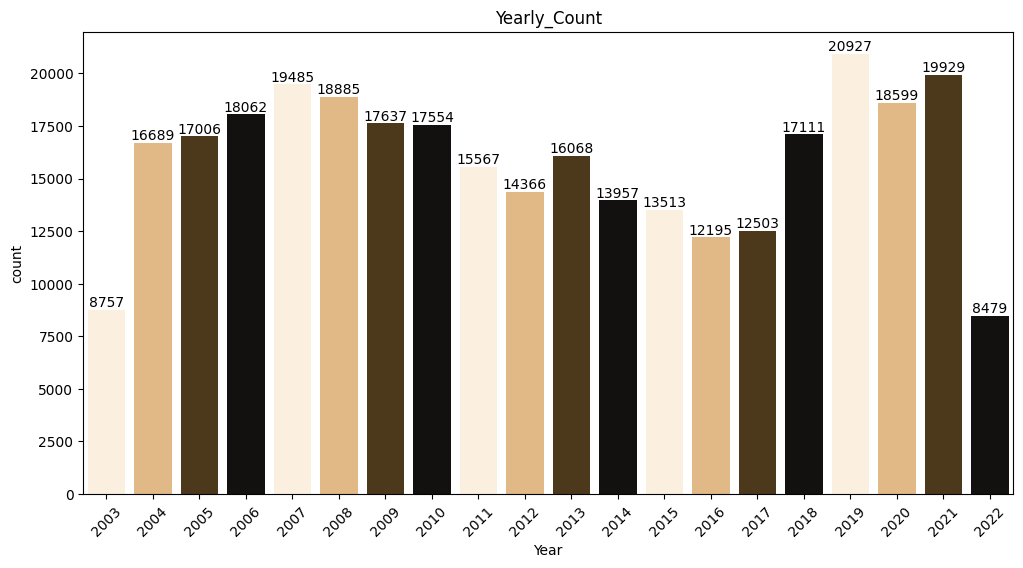

In [22]:
barplor_(count_year.index,count_year.values,'Year','count','Yearly_Count')

# **month**

In [23]:
count_month = df.month.value_counts()

In [24]:
count_month

,count
month,
1,26852
12,26739
9,26630
8,26577
4,26524
3,26491
11,26371
2,26324
6,26268


In [25]:

print(f'The month {df.month.value_counts().idxmax()} has the highest rate: {df.month.value_counts().max()}')
print(f'The month {df.month.value_counts().idxmin()} has the lowest rate: {df.month.value_counts().min()}')


The month 1 has the highest rate: 26852
The month 7 has the lowest rate: 26056


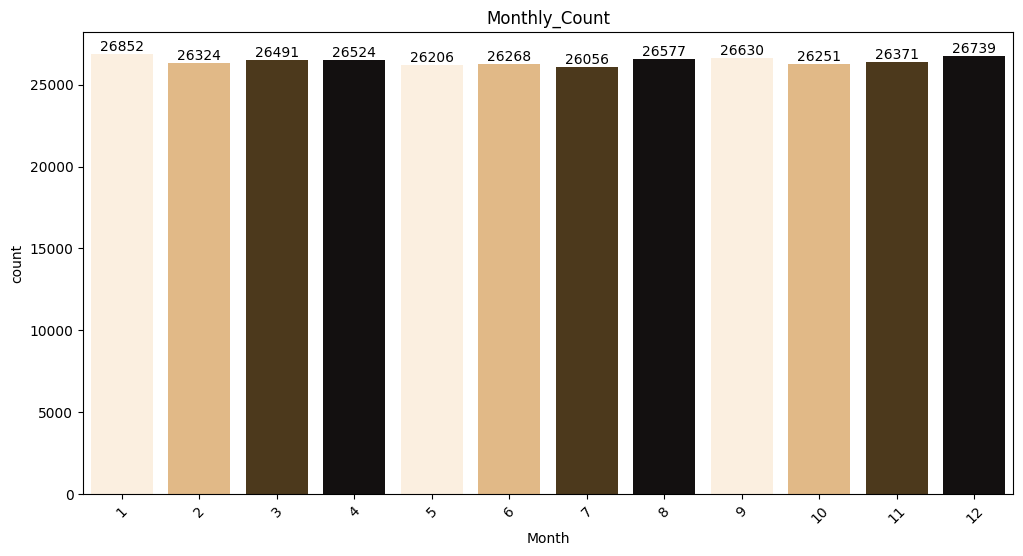

In [26]:
barplor_(count_month.index,count_month.values,'Month','count','Monthly_Count')


In [27]:
df.carrier.unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'QX', 'UA', 'WN', 'YV', 'YX', 'EV', 'VX', 'US', 'FL', 'XE',
       'CO', 'NW', 'AQ', 'TZ', 'RU', 'DH', 'HP'], dtype=object)

# **carrier_name**

In [28]:
df.carrier_name.unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.', 'Horizon Air',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airline',
       'ExpressJet Airlines LLC', 'ExpressJet Airlines Inc.',
       'Virgin America', 'US Airways Inc.', 'AirTran Airways Corporation',
       'American Eagle Airlines Inc.', 'Pinnacle Airlines Inc.',
       'Atlantic Southeast Airlines', 'Continental Air Lines Inc.',
       'Comair Inc.', 'Northwest Airlines Inc.', 'Aloha Airlines Inc.',
       'ATA Airlines d/b/a ATA', 'Independence Air',
       'America West Airlines Inc.', 'Atlantic Coast Airlines'],
      dtype=object)

In [29]:
count_carrier_name = df.carrier_name.value_counts()

In [30]:
count_carrier_name

,count
carrier_name,
SkyWest Airlines Inc.,38038
Delta Air Lines Inc.,27518
ExpressJet Airlines Inc.,24487
American Airlines Inc.,19770
United Air Lines Inc.,19096
Southwest Airlines Co.,17576
American Eagle Airlines Inc.,15404
Mesa Airlines Inc.,14483
Alaska Airlines Inc.,12940


In [31]:

print(f'The month {df.carrier_name.value_counts().idxmax()} has the highest rate: {df.carrier_name.value_counts().max()}')
print(f'The month {df.carrier_name.value_counts().idxmin()} has the lowest rate: {df.carrier_name.value_counts().min()}')


The month SkyWest Airlines Inc. has the highest rate: 38038
The month Aloha Airlines Inc. has the lowest rate: 253


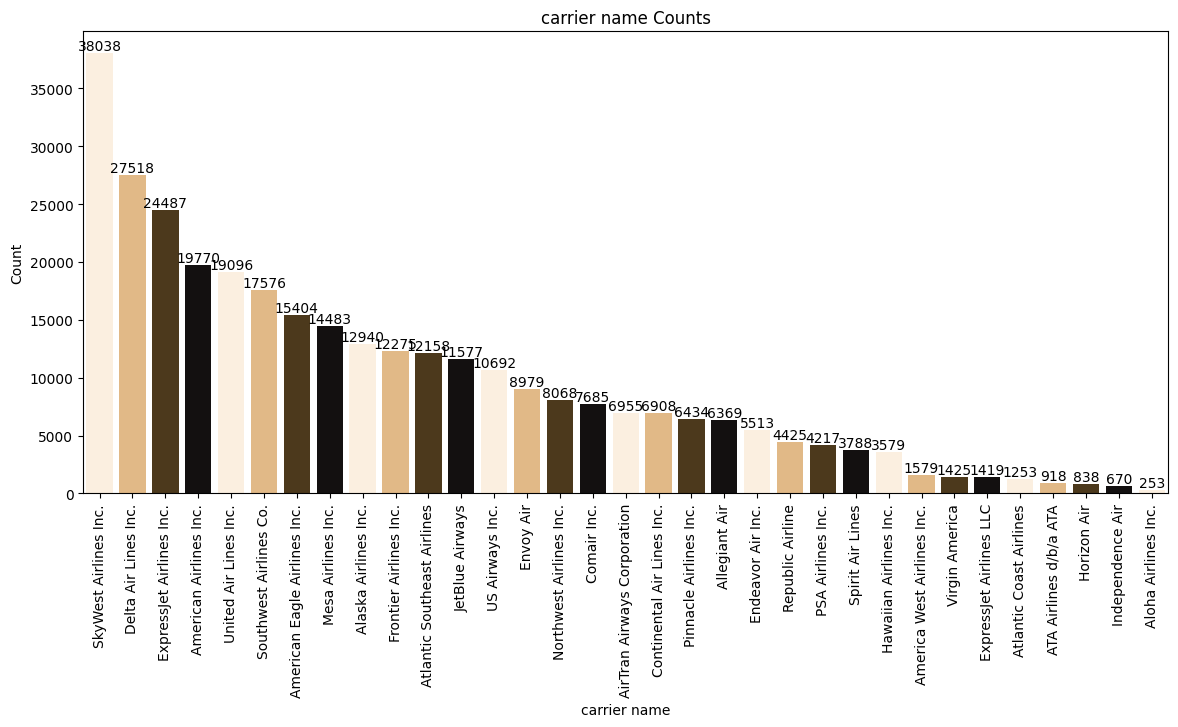

In [32]:
plt.figure(figsize=(14, 6))
ax= sns.barplot(x=count_carrier_name.index, y=count_carrier_name.values,palette=color)
for p in ax.containers:
    ax.bar_label(p)

plt.xlabel('carrier name')
plt.ylabel('Count')
plt.title('carrier name Counts')
plt.xticks(rotation=90)
plt.show()

In [33]:
df.groupby(['carrier_name', 'month'])['year'].value_counts().idxmax()

('SkyWest Airlines Inc.', 3, 2020)

In [34]:
df.groupby('carrier_name')['month'].value_counts().idxmax()

('SkyWest Airlines Inc.', 4)

In [35]:
df.groupby(['carrier_name', 'month'])['year'].value_counts().idxmin()

('Hawaiian Airlines Inc.', 4, 2020)

In [36]:
for i in df.year.unique():
  print(f"In the year {i}, the largest airline is {df[df.year == i].groupby('carrier_name')['year'].value_counts().idxmax()} with {df[df.year == i].groupby('carrier_name')['year'].value_counts().max()} flights.")
  print(f"In the year {i}, the airline with the lowest count is {df[df.year == i].groupby('carrier_name')['year'].value_counts().idxmin()} with {df[df.year == i].groupby('carrier_name')['year'].value_counts().min()} flights.")
  print("-" * 40)

In the year 2022, the largest airline is ('SkyWest Airlines Inc.', 2022) with 1182 flights.
In the year 2022, the airline with the lowest count is ('Hawaiian Airlines Inc.', 2022) with 110 flights.
----------------------------------------
In the year 2021, the largest airline is ('SkyWest Airlines Inc.', 2021) with 2745 flights.
In the year 2021, the airline with the lowest count is ('Hawaiian Airlines Inc.', 2021) with 249 flights.
----------------------------------------
In the year 2020, the largest airline is ('SkyWest Airlines Inc.', 2020) with 2727 flights.
In the year 2020, the airline with the lowest count is ('Hawaiian Airlines Inc.', 2020) with 158 flights.
----------------------------------------
In the year 2019, the largest airline is ('SkyWest Airlines Inc.', 2019) with 2957 flights.
In the year 2019, the airline with the lowest count is ('Hawaiian Airlines Inc.', 2019) with 225 flights.
----------------------------------------
In the year 2018, the largest airline is ('S

# **airport_name**

In [37]:
df.airport_name.unique()


array(['Allentown/Bethlehem/Easton, PA: Lehigh Valley International',
       'Albany, GA: Southwest Georgia Regional',
       'Nantucket, MA: Nantucket Memorial',
       'Alexandria, LA: Alexandria International',
       'Augusta, GA: Augusta Regional at Bush Field',
       'Albany, NY: Albany International',
       'Atlanta, GA: Hartsfield-Jackson Atlanta International',
       'Appleton, WI: Appleton International',
       'Austin, TX: Austin - Bergstrom International',
       'Asheville, NC: Asheville Regional',
       'Kalamazoo, MI: Kalamazoo/Battle Creek International',
       'Binghamton, NY: Greater Binghamton/Edwin A. Link Field',
       'Bangor, ME: Bangor International',
       'Birmingham, AL: Birmingham-Shuttlesworth International',
       'Bloomington/Normal, IL: Central Il Regional Airport at Bloomington',
       'Nashville, TN: Nashville International',
       'Boston, MA: Logan International',
       'Brunswick, GA: Brunswick Golden Isles',
       'Baton Rouge, LA: Bat

In [38]:

print(f'The airport name {df.airport_name.value_counts().idxmax()} has the highest rate: {df.airport_name.value_counts().max()}')
print(f'The airport name {df.airport_name.value_counts().idxmin()} has the lowest rate: {df.airport_name.value_counts().min()}')


The airport name Detroit, MI: Detroit Metro Wayne County has the highest rate: 3022
The airport name Greenville, MS: Greenville Mid Delta has the lowest rate: 1


# **arr_flights**

In [39]:
df[df['arr_flights'] == df['arr_flights'].max()][['carrier_name', 'airport_name', 'arr_flights']]



,carrier_name,airport_name,arr_flights
102229,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21977.0


In [40]:
df[df['arr_flights'] == df['arr_flights']][['carrier_name', 'airport_name', 'arr_flights']].sort_values(by='arr_flights', ascending=False).head()


,carrier_name,airport_name,arr_flights
102229,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21977.0
75317,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21931.0
54722,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21873.0
56500,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21839.0
76872,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21688.0


In [41]:
df.groupby('carrier_name')['arr_flights'].mean().sort_values(ascending=False)

,arr_flights
carrier_name,
Southwest Airlines Co.,1254.759274
American Airlines Inc.,656.127264
Delta Air Lines Inc.,497.506868
US Airways Inc.,485.279742
United Air Lines Inc.,484.625105
Continental Air Lines Inc.,354.250579
Aloha Airlines Inc.,353.940711
AirTran Airways Corporation,349.067146
JetBlue Airways,347.862486


In [42]:
df[df['arr_flights'] == df['arr_flights']][['carrier_name', 'airport_name', 'arr_flights']].sort_values(by='arr_flights', ascending=True).head()


,carrier_name,airport_name,arr_flights
240151,Frontier Airlines Inc.,"El Paso, TX: El Paso International",1.0
148007,SkyWest Airlines Inc.,"Chicago, IL: Chicago Midway International",1.0
140337,ExpressJet Airlines Inc.,"Tampa, FL: Tampa International",1.0
1612,Mesa Airlines Inc.,"Syracuse, NY: Syracuse Hancock International",1.0
178834,Delta Air Lines Inc.,"Montrose/Delta, CO: Montrose Regional",1.0


# **arr_del15**

In [43]:
df


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [44]:
df.arr_del15.mean()

72.90440261086896

In [45]:
df[df['arr_del15'] == df['arr_del15']][['carrier_name', 'airport_name', 'arr_del15']].sort_values(by='arr_del15', ascending=False).head(10)


,carrier_name,airport_name,arr_del15
282932,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",6377.0
301266,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",6029.0
281504,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5862.0
306795,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5778.0
144670,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5268.0
260669,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4966.0
247832,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",4946.0
294880,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4830.0
302666,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4773.0
284355,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4761.0


In [46]:
df.groupby('carrier_name')['arr_del15'].mean().sort_values(ascending=False)

,arr_del15
carrier_name,
Southwest Airlines Co.,230.621359
American Airlines Inc.,131.980172
United Air Lines Inc.,95.029902
US Airways Inc.,93.262252
JetBlue Airways,82.373499
Delta Air Lines Inc.,79.188786
Continental Air Lines Inc.,77.772438
Northwest Airlines Inc.,75.610932
American Eagle Airlines Inc.,73.303363


# **carrier_ct**

In [47]:
df[df['carrier_ct'] == df['carrier_ct']][['carrier_name', 'airport_name', 'carrier_ct']].sort_values(by='carrier_ct', ascending=False).head()


,carrier_name,airport_name,carrier_ct
244887,Atlantic Southeast Airlines,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1792.07
241630,Atlantic Southeast Airlines,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1671.02
265540,Atlantic Southeast Airlines,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1603.15
243333,Atlantic Southeast Airlines,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1589.43
239443,Atlantic Southeast Airlines,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1589.13


In [48]:
df.groupby('carrier_name')['carrier_ct'].mean().sort_values(ascending=False)

,carrier_ct
carrier_name,
Southwest Airlines Co.,67.174341
American Airlines Inc.,38.732839
United Air Lines Inc.,25.613321
US Airways Inc.,25.493173
JetBlue Airways,24.773744
Northwest Airlines Inc.,24.558989
Delta Air Lines Inc.,23.635301
America West Airlines Inc.,20.575795
Comair Inc.,19.023239


**weather_ct**

In [49]:
df[df['weather_ct'] == df['weather_ct']][['carrier_name','year','month', 'airport_name', 'weather_ct']].sort_values(by='weather_ct', ascending=False).head()


,carrier_name,year,month,airport_name,weather_ct
291996,Comair Inc.,2005,1,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",717.94
293398,Comair Inc.,2004,12,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",698.04
246528,Atlantic Southeast Airlines,2007,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",641.54
296174,Comair Inc.,2004,10,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",617.36
303206,Comair Inc.,2004,5,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",575.84


In [50]:
df.groupby('carrier_name')['weather_ct'].mean().sort_values(ascending=False)

,weather_ct
carrier_name,
Comair Inc.,9.506951
American Airlines Inc.,6.026767
Southwest Airlines Co.,5.228510
Virgin America,4.835361
Atlantic Southeast Airlines,4.779562
Northwest Airlines Inc.,3.725844
American Eagle Airlines Inc.,3.564982
Atlantic Coast Airlines,2.926345
United Air Lines Inc.,2.633097


# **nas_ct***

In [51]:
df[df['nas_ct'] == df['nas_ct']][['carrier_name','year','month', 'airport_name', 'nas_ct']].sort_values(by='nas_ct', ascending=False).head()

,carrier_name,year,month,airport_name,nas_ct
306795,Delta Air Lines Inc.,2004,2,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4091.27
282932,Delta Air Lines Inc.,2005,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3962.83
281504,Delta Air Lines Inc.,2005,8,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3887.34
301266,Delta Air Lines Inc.,2004,6,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3730.86
294880,Delta Air Lines Inc.,2004,11,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3317.57


In [52]:
df.groupby('carrier_name')['nas_ct'].mean().sort_values(ascending=False)

,nas_ct
carrier_name,
American Airlines Inc.,46.562633
Southwest Airlines Co.,41.920225
Continental Air Lines Inc.,41.470290
US Airways Inc.,40.360874
United Air Lines Inc.,35.921888
Northwest Airlines Inc.,34.093350
Spirit Air Lines,33.262558
Delta Air Lines Inc.,31.864257
JetBlue Airways,28.348359


# **security_ct**

In [53]:
df.security_ct.mean()

0.17917211122982515

In [54]:

df[df['security_ct'] == df['security_ct']][['carrier_name','year','month', 'airport_name','security_ct' ]].sort_values(by='security_ct', ascending=False).head()

,carrier_name,year,month,airport_name,security_ct
263463,American Airlines Inc.,2006,8,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",80.56
263643,Continental Air Lines Inc.,2006,8,"Houston, TX: George Bush Intercontinental/Houston",53.68
264226,Northwest Airlines Inc.,2006,8,"Minneapolis, MN: Minneapolis-St Paul Internati...",52.99
246263,Alaska Airlines Inc.,2007,7,"Anchorage, AK: Ted Stevens Anchorage Internati...",45.94
264186,Northwest Airlines Inc.,2006,8,"Detroit, MI: Detroit Metro Wayne County",42.64


In [55]:
df.groupby('carrier_name')['security_ct'].mean().sort_values(ascending=False)

,security_ct
carrier_name,
Southwest Airlines Co.,0.812102
Continental Air Lines Inc.,0.534362
Spirit Air Lines,0.486711
America West Airlines Inc.,0.446295
ATA Airlines d/b/a ATA,0.366187
Alaska Airlines Inc.,0.324187
JetBlue Airways,0.308165
American Airlines Inc.,0.284647
US Airways Inc.,0.283964


# ***late_aircraft_ct***

In [56]:
df.late_aircraft_ct.mean()

24.994626034939756

In [57]:
df[df['late_aircraft_ct'] == df['late_aircraft_ct']][['carrier_name','year','month', 'airport_name','late_aircraft_ct' ]].sort_values(by='late_aircraft_ct', ascending=False).head()

,carrier_name,year,month,airport_name,late_aircraft_ct
214906,Atlantic Southeast Airlines,2009,3,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1885.47
130649,American Airlines Inc.,2014,6,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1849.00
247832,American Airlines Inc.,2007,6,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1831.29
219400,Atlantic Southeast Airlines,2008,12,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1752.37
157328,American Airlines Inc.,2012,9,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1742.39


In [58]:
df.groupby('carrier_name')['late_aircraft_ct'].mean().sort_values(ascending=False)

,late_aircraft_ct
carrier_name,
Southwest Airlines Co.,115.486220
American Airlines Inc.,40.373272
United Air Lines Inc.,30.825114
AirTran Airways Corporation,29.274893
JetBlue Airways,27.619426
American Eagle Airlines Inc.,27.508832
Independence Air,26.123119
US Airways Inc.,25.426395
Atlantic Coast Airlines,22.701014


# **arr_cancelled**

In [59]:
df.arr_cancelled.mean()

7.206316638774115

In [60]:
df[df['arr_cancelled'] == df['arr_cancelled']][['carrier_name','year','month', 'airport_name','arr_cancelled' ]].sort_values(by='arr_cancelled', ascending=False).head()

,carrier_name,year,month,airport_name,arr_cancelled
42296,Delta Air Lines Inc.,2020,3,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4951.0
41263,PSA Airlines Inc.,2020,4,"Charlotte, NC: Charlotte Douglas International",3154.0
40398,American Airlines Inc.,2020,4,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2945.0
41686,Southwest Airlines Co.,2020,4,"Denver, CO: Denver International",2839.0
41705,Southwest Airlines Co.,2020,4,"Las Vegas, NV: McCarran International",2730.0


In [61]:
df.groupby('carrier_name')['arr_cancelled'].mean().sort_values(ascending=False)

,arr_cancelled
carrier_name,
Southwest Airlines Co.,19.298589
American Airlines Inc.,13.406070
American Eagle Airlines Inc.,11.572254
Atlantic Coast Airlines,9.545092
Republic Airline,8.472542
ExpressJet Airlines Inc.,7.840201
United Air Lines Inc.,7.703079
Comair Inc.,7.551724
PSA Airlines Inc.,7.297605


# **arr_diverted**

In [62]:
df.arr_diverted.mean()

0.8681927202014568

In [63]:
df[df['arr_diverted'] == df['arr_diverted']][['carrier_name','year','month', 'airport_name','arr_diverted' ]].sort_values(by='arr_diverted', ascending=False).head()

,carrier_name,year,month,airport_name,arr_diverted
177814,American Airlines Inc.,2011,5,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",256.0
247832,American Airlines Inc.,2007,6,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",248.0
137612,Southwest Airlines Co.,2014,1,"Chicago, IL: Chicago Midway International",197.0
282932,Delta Air Lines Inc.,2005,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",187.0
261734,ExpressJet Airlines Inc.,2006,10,"Houston, TX: George Bush Intercontinental/Houston",183.0


In [64]:
df.groupby('airport_name')['arr_diverted'].count().sort_values(ascending=False).head()

,arr_diverted
airport_name,
"Detroit, MI: Detroit Metro Wayne County",3022
"Los Angeles, CA: Los Angeles International",2988
"Las Vegas, NV: McCarran International",2978
"Kansas City, MO: Kansas City International",2964
"Pittsburgh, PA: Pittsburgh International",2947


In [65]:
df.groupby('airport_name')['arr_diverted'].count().sort_values(ascending=False).tail()

,arr_diverted
airport_name,
"Kansas City, MO: Charles B. Wheeler Downtown",1
"Columbus, MS: Columbus AFB",1
"Spokane, WA: Fairchild AFB",1
"Rapid City, SD: Ellsworth AFB",1
"Youngstown/Warren, OH: Youngstown-Warren Regional",1


# **arr_delay**

In [66]:
df.arr_delay.mean()

4213.131974319942

In [67]:
df[df['arr_delay'] == df['arr_delay']][['carrier_name','year','month', 'airport_name','arr_delay' ]].sort_values(by='arr_delay', ascending=False).head()

,carrier_name,year,month,airport_name,arr_delay
282932,Delta Air Lines Inc.,2005,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",433687.0
94023,Delta Air Lines Inc.,2017,4,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",429194.0
102229,Delta Air Lines Inc.,2016,8,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",395609.0
78084,Delta Air Lines Inc.,2018,6,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",370937.0
144670,Delta Air Lines Inc.,2013,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",369537.0


In [68]:
df.groupby('carrier_name')['arr_delay'].mean().sort_values(ascending=False)

,arr_delay
carrier_name,
Southwest Airlines Co.,11242.021393
American Airlines Inc.,8029.828781
United Air Lines Inc.,5979.190406
JetBlue Airways,5429.910599
Delta Air Lines Inc.,4575.015808
US Airways Inc.,4518.197250
Continental Air Lines Inc.,4342.791836
Spirit Air Lines,4336.106389
American Eagle Airlines Inc.,4182.368281


In [69]:
df.groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False)

,arr_delay
airport_name,
"Chicago, IL: Chicago O'Hare International",31867.799072
"Atlanta, GA: Hartsfield-Jackson Atlanta International",27830.672920
"Dallas/Fort Worth, TX: Dallas/Fort Worth International",20571.237799
"Newark, NJ: Newark Liberty International",17511.091818
"San Francisco, CA: San Francisco International",16140.159024
...,...
"Greenville, MS: Greenville Mid Delta",0.000000
"Rapid City, SD: Ellsworth AFB",0.000000
"Fort Collins/Loveland, CO: Northern Colorado Regional",0.000000


# **carrier_delay**

In [70]:
df.carrier_delay.mean()

1287.5566849150143

In [71]:
df[df['carrier_delay'] == df['carrier_delay']][['carrier_name','year','month', 'airport_name','carrier_delay' ]].sort_values(by='carrier_delay', ascending=False).head()

,carrier_name,year,month,airport_name,carrier_delay
102229,Delta Air Lines Inc.,2016,8,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",196944.0
94023,Delta Air Lines Inc.,2017,4,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",151581.0
244887,Atlantic Southeast Airlines,2007,8,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",134693.0
243333,Atlantic Southeast Airlines,2007,9,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",129148.0
246528,Atlantic Southeast Airlines,2007,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",119165.0


In [72]:
df.groupby('carrier_name')['carrier_delay'].mean().sort_values(ascending=False)

,carrier_delay
carrier_name,
Southwest Airlines Co.,3101.249488
American Airlines Inc.,2568.855387
JetBlue Airways,1655.884685
Delta Air Lines Inc.,1630.079003
United Air Lines Inc.,1574.728791
Northwest Airlines Inc.,1455.754462
US Airways Inc.,1281.730733
SkyWest Airlines Inc.,1198.004180
Atlantic Southeast Airlines,1138.144925


# **weather_delay**

In [73]:
df.weather_delay.mean()

220.73438095868434

In [74]:
df[df['weather_delay'] == df['weather_delay']][['carrier_name','year','month', 'airport_name','weather_delay' ]].sort_values(by='weather_delay', ascending=False).head()

,carrier_name,year,month,airport_name,weather_delay
246528,Atlantic Southeast Airlines,2007,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",57707.0
227094,Atlantic Southeast Airlines,2008,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",56006.0
248176,Atlantic Southeast Airlines,2007,6,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",50610.0
293398,Comair Inc.,2004,12,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",46014.0
244887,Atlantic Southeast Airlines,2007,8,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",43115.0


In [75]:
df.groupby('carrier_name')['weather_delay'].mean().sort_values(ascending=False)

,weather_delay
carrier_name,
Comair Inc.,631.086532
American Airlines Inc.,475.569803
Southwest Airlines Co.,414.830792
Atlantic Southeast Airlines,355.215660
American Eagle Airlines Inc.,292.727863
Northwest Airlines Inc.,290.299826
Atlantic Coast Airlines,253.213887
Delta Air Lines Inc.,244.435787
United Air Lines Inc.,237.552734


**nas_delay**

In [76]:
df.nas_delay.mean()

1100.348105355055

In [77]:
df[df['nas_delay'] == df['nas_delay']][['carrier_name','year','month', 'airport_name','nas_delay' ]].sort_values(by='nas_delay', ascending=False).head()

,carrier_name,year,month,airport_name,nas_delay
282932,Delta Air Lines Inc.,2005,7,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",238440.0
281504,Delta Air Lines Inc.,2005,8,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",205865.0
306795,Delta Air Lines Inc.,2004,2,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",199891.0
288631,Delta Air Lines Inc.,2005,3,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",194725.0
301266,Delta Air Lines Inc.,2004,6,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",192593.0


In [78]:
df.groupby('carrier_name')['nas_delay'].mean().sort_values(ascending=False)

,nas_delay
carrier_name,
American Airlines Inc.,2100.668538
Continental Air Lines Inc.,2033.592501
Spirit Air Lines,1967.779039
United Air Lines Inc.,1763.419617
Southwest Airlines Co.,1676.031577
US Airways Inc.,1595.568556
JetBlue Airways,1494.858253
Virgin America,1474.776842
Delta Air Lines Inc.,1361.031688


# **security_delay**

In [79]:
df.security_delay.mean()

7.2202566114803854

In [80]:
df[df['security_delay'] == df['security_delay']][['carrier_name','year','month', 'airport_name','security_delay' ]].sort_values(by='security_delay', ascending=False).head()

,carrier_name,year,month,airport_name,security_delay
23025,Spirit Air Lines,2021,4,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",3760.0
66286,Southwest Airlines Co.,2019,2,"Orlando, FL: Orlando International",3194.0
263463,American Airlines Inc.,2006,8,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",3119.0
74865,Southwest Airlines Co.,2018,9,"Phoenix, AZ: Phoenix Sky Harbor International",2897.0
22481,JetBlue Airways,2021,4,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2465.0


In [81]:
df.groupby('carrier_name')['security_delay'].mean().sort_values(ascending=False)

,security_delay
carrier_name,
Southwest Airlines Co.,28.929677
Spirit Air Lines,22.070222
Continental Air Lines Inc.,17.802403
America West Airlines Inc.,15.369221
ATA Airlines d/b/a ATA,14.063181
JetBlue Airways,13.608621
American Airlines Inc.,13.226859
Virgin America,13.080000
Alaska Airlines Inc.,11.485394


# **late_aircraft_delay**

In [82]:
df.late_aircraft_delay.mean()

1597.2702678000182

In [83]:
df.groupby('carrier_name')['late_aircraft_delay'].mean().sort_values(ascending=False)

,late_aircraft_delay
carrier_name,
Southwest Airlines Co.,6020.979859
American Airlines Inc.,2871.508194
United Air Lines Inc.,2401.189883
JetBlue Airways,2116.907403
AirTran Airways Corporation,1987.212940
Independence Air,1765.541791
American Eagle Airlines Inc.,1632.210270
Atlantic Coast Airlines,1596.964086
ExpressJet Airlines Inc.,1536.646016


In [84]:
df[df['late_aircraft_delay'] == df['late_aircraft_delay']][['carrier_name','year','month', 'airport_name','late_aircraft_delay' ]].sort_values(by='late_aircraft_delay', ascending=False).head()

,carrier_name,year,month,airport_name,late_aircraft_delay
130649,American Airlines Inc.,2014,6,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",148181.0
94023,Delta Air Lines Inc.,2017,4,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",147167.0
214906,Atlantic Southeast Airlines,2009,3,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",145680.0
17252,American Airlines Inc.,2021,7,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",143192.0
247832,American Airlines Inc.,2007,6,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",142872.0


# **data preprocessing**

In [85]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [86]:
df.drop(['carrier','carrier_name','airport','airport_name'],axis=1,inplace=True)

In [87]:
df.drop(['year','month'],axis=1,inplace=True)

In [88]:
df

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [89]:
df_corr = df.corr()

<Axes: >

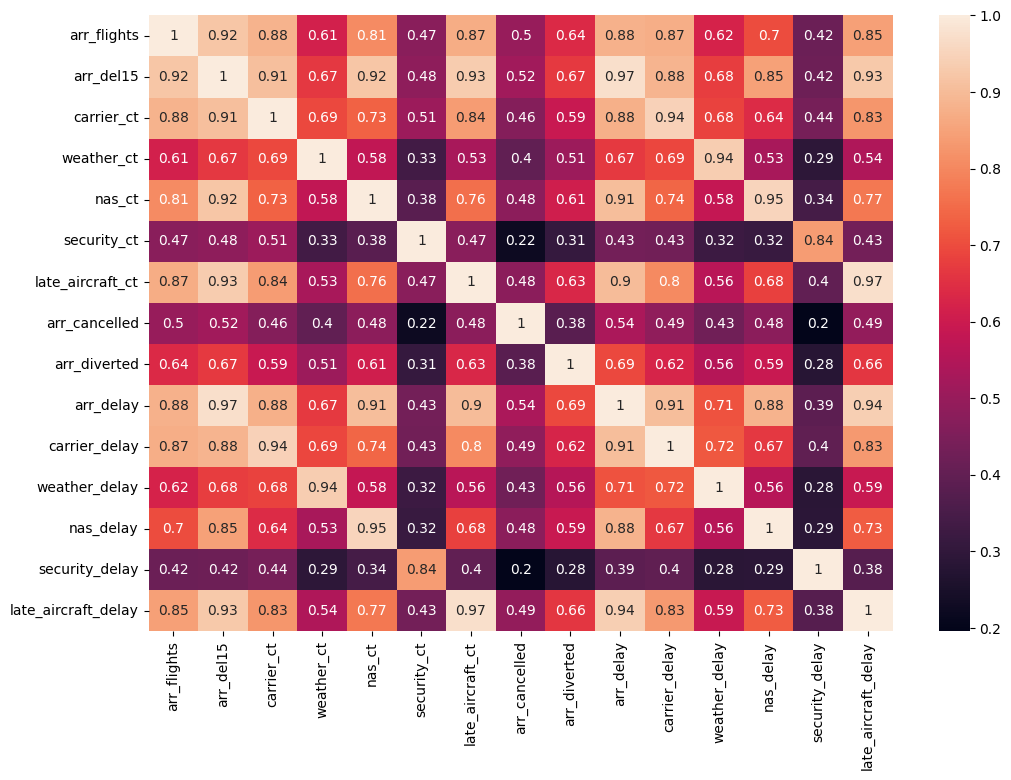

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True)

In [91]:
df.describe()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000
mean,382.046226,72.904403,21.088920,2.618358,24.023386,0.179172,24.994626,7.206317,0.868193,4213.131974,1287.556685,220.734381,1100.348105,7.220257,1597.270268
std,1027.486006,198.935595,47.685808,9.972059,85.143379,0.845139,75.300552,37.227520,3.917172,12523.106018,3516.548396,861.825845,4638.130463,38.868752,4926.617274
min,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,59.000000,9.000000,3.010000,0.000000,1.690000,0.000000,1.650000,0.000000,0.000000,437.000000,149.000000,0.000000,56.000000,0.000000,79.000000
50%,120.000000,23.000000,8.210000,0.580000,5.500000,0.000000,5.870000,1.000000,0.000000,1203.000000,437.000000,25.000000,203.000000,0.000000,352.000000
75%,274.000000,56.000000,19.710000,2.000000,15.370000,0.000000,17.050000,4.000000,1.000000,3083.000000,1101.000000,159.000000,602.000000,0.000000,1111.000000
max,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [92]:
df.weather_delay.min() , df.weather_delay.max()

(0.0, 57707.0)

In [93]:
df['wcase'] = df.weather_delay.apply(lambda x: 1 if x > 100 else 0)

In [94]:
df.wcase.value_counts()

,count
wcase,
0,215128
1,102161


In [95]:
df

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,wcase
0,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,1
318013,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,1
318014,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [96]:
x = df.drop(['wcase','weather_delay'],axis=1)
y = df.wcase

In [97]:
X_trian, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44,shuffle=True)

In [98]:
print(X_trian.shape, X_test.shape, y_train.shape, y_test.shape)

(253831, 14) (63458, 14) (253831,) (63458,)


In [99]:
Model = keras.Sequential(
    [
        # keras.Input(shape=(5,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')

    ]
)

In [100]:
Optmzer = keras.optimizers.Adam(learning_rate=0.001)

In [101]:

Model.compile(
    loss='binary_crossentropy',
    optimizer=Optmzer,
    metrics=['accuracy']
)

In [102]:
history = Model.fit(X_trian, y_train, batch_size=1000, epochs=100, validation_split=0.2
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

                    )

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5382 - loss: 13.7034 - val_accuracy: 0.8038 - val_loss: 0.4693
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7822 - loss: 0.6042 - val_accuracy: 0.8142 - val_loss: 0.4085
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8066 - loss: 0.4181 - val_accuracy: 0.8213 - val_loss: 0.3752
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8215 - loss: 0.3846 - val_accuracy: 0.8416 - val_loss: 0.3432
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8488 - loss: 0.3306 - val_accuracy: 0.8884 - val_loss: 0.2669
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9161 - loss: 0.2103 - val_accuracy: 0.9643 - val_loss: 0.1078
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9613 - loss: 0.1064 - val_accuracy: 0.9747 - val_loss: 0.0728
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9729 - loss: 0.0769 - val_

In [103]:
print(Model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,389 (83.55 KB)

 Trainable params: 7,129 (27.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,260 (55.71 KB)

None


In [104]:
Model.save('USA Airline Delay Cause final save.h5')

In [105]:
X_test

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,nas_delay,security_delay,late_aircraft_delay
295289,201.0,51.0,20.61,6.32,5.02,0.00,19.05,8.0,0.0,2827.0,964.0,308.0,0.0,1006.0
7700,191.0,61.0,14.27,1.90,29.59,0.15,15.09,10.0,1.0,3667.0,923.0,1686.0,13.0,988.0
298679,93.0,13.0,2.15,0.00,5.40,0.00,5.45,1.0,0.0,448.0,68.0,190.0,0.0,190.0
67396,118.0,37.0,8.16,1.92,7.42,0.00,19.49,3.0,0.0,4079.0,904.0,462.0,0.0,1468.0
214274,1170.0,299.0,53.86,13.21,125.44,0.32,106.17,15.0,1.0,16353.0,2539.0,6893.0,6.0,6171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128348,55.0,19.0,8.54,1.34,4.05,0.00,5.07,0.0,0.0,1043.0,458.0,153.0,0.0,279.0
164975,36.0,7.0,3.41,0.00,2.11,0.00,1.47,0.0,0.0,243.0,105.0,50.0,0.0,88.0
55713,186.0,32.0,9.71,1.10,8.95,0.00,12.25,2.0,0.0,2425.0,1155.0,352.0,0.0,836.0
148955,204.0,37.0,17.51,1.00,3.84,0.00,14.65,1.0,0.0,1939.0,777.0,175.0,0.0,845.0


In [106]:
y_pred = Model.predict(X_test)

1984/1984 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [107]:
print(y_pred.shape)

(63458, 1)


In [108]:
y_pred[:5]

array([[1.0000000e+00],
       [2.0342268e-04],
       [1.9594326e-12],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [109]:
y_test[:5]

,wcase
295289,1
7700,0
298679,0
67396,1
214274,1


In [110]:
Modelloss , Modelaccuracy = Model.evaluate(X_test,y_test)
print(f'Modelloss: {Modelloss}, Modelaccuracy: {Modelaccuracy}')

1984/1984 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9953 - loss: 0.0129
Modelloss: 0.012552370317280293, Modelaccuracy: 0.9954615831375122


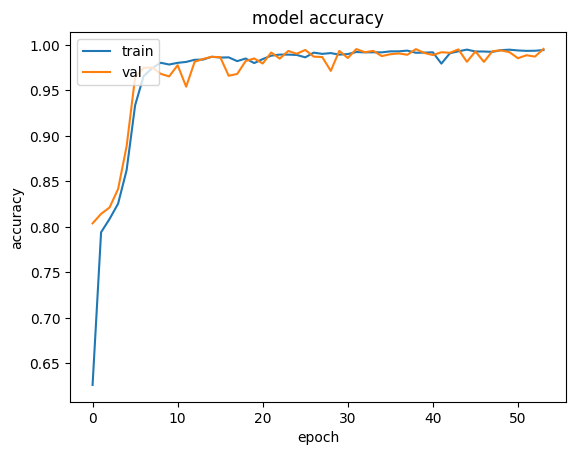

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

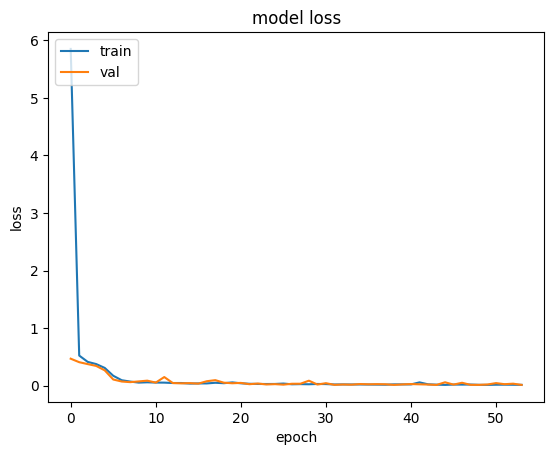

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [113]:
confusion_matrix(y_test, y_pred.round())

array([[42687,   213],
       [   75, 20483]])

<Axes: >

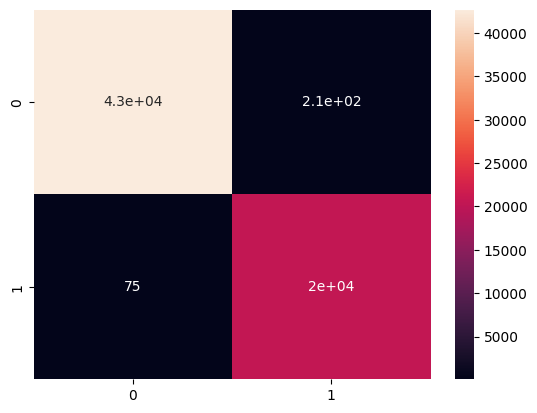

In [114]:
sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot=True)

In [115]:
classification_report(y_test, y_pred.round())

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     42900\n           1       0.99      1.00      0.99     20558\n\n    accuracy                           1.00     63458\n   macro avg       0.99      1.00      0.99     63458\nweighted avg       1.00      1.00      1.00     63458\n'